In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [76]:
df = pd.read_csv("../Datasets/indian_population_data.csv")
df = df.dropna()
df = df[df['Total/\nRural/\nUrban']=='Urban']
df = df[(df['India/ State/ Union Territory/ District/ Sub-district']=='DISTRICT')|
        (df['India/ State/ Union Territory/ District/ Sub-district']=='SUB-DISTRICT')]

In [77]:
dfc = df.copy()
dfc = dfc[['Number of towns', 'Number of households',
       'Population-persons', 'Population-male', 'Population-female',
       'Area\n (In sq. km)', 'Population per sq. km.']]
dfc

,Number of towns,Number of households,Population-persons,Population-male,Population-female,Area\n (In sq. km),Population per sq. km.
9,10,11999,104729,62152,42577,47.34,2212.0
12,7,7008,75591,44981,30610,26.91,2809.0
15,1,2011,13600,7379,6221,8.50,1600.0
18,2,2980,15538,9792,5746,11.93,1302.0
21,9,13946,97912,54656,43256,49.05,1996.0
...,...,...,...,...,...,...,...
19980,1,724,2741,1404,1337,5.95,461.0
19983,4,35297,140747,75180,65567,31.97,4402.0
19986,1,1907,7962,4091,3871,3.57,2230.0
19989,3,33390,132785,71089,61696,28.40,4676.0


In [78]:
# Scaling
scaler = StandardScaler()
dfc = pd.DataFrame(scaler.fit_transform(dfc),columns = dfc.columns,index=dfc.index)
dfc

,Number of towns,Number of households,Population-persons,Population-male,Population-female,Area\n (In sq. km),Population per sq. km.
9,1.198890,-0.128615,-0.022994,0.011768,-0.061281,0.194854,-0.029319
12,0.725300,-0.179527,-0.090054,-0.063560,-0.119144,-0.050699,0.104821
15,-0.221879,-0.230501,-0.232723,-0.228519,-0.237072,-0.271974,-0.166829
18,-0.064015,-0.220616,-0.228263,-0.217934,-0.239369,-0.230748,-0.233787
21,1.041027,-0.108754,-0.038683,-0.021117,-0.057998,0.215406,-0.077852
...,...,...,...,...,...,...,...
19980,-0.221879,-0.243629,-0.257714,-0.254732,-0.260687,-0.302623,-0.422751
19983,0.251711,0.109043,0.059899,0.068922,0.049882,0.010118,0.462751
19986,-0.221879,-0.231562,-0.245699,-0.242944,-0.248435,-0.331228,-0.025275
19989,0.093848,0.089590,0.041575,0.050975,0.031165,-0.032791,0.524316


In [79]:
cluster_tab = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i,random_state=11)
    l = kmeans.fit_predict(dfc)
    no_of_clusters = len(set(l))
    s = silhouette_score(dfc,l)
    c = {'model' : 'KMeans',
            'Parameters' : f'nclusters = {i}',
            'No_of_clusters' : no_of_clusters,
            'silhouette_score' : s}
    cluster_tab.append(c)
    
for i in range(2,6):
    j = 0.2 
    while j <= 3:
        dbscan = DBSCAN(min_samples=i,eps=j)
        l = dbscan.fit_predict(dfc)
        if len(set(l))>=2:
            no_of_clusters = len(set(l))
            s = silhouette_score(dfc,l)
            c = {'model' : 'DBSCAN',
                    'Parameters' : f'min_samples = {i} | eps = {j}',
                    'No_of_clusters' : no_of_clusters,
                    'silhouette_score' : s}
            cluster_tab.append(c)
        else:
            pass
        j = round(j+0.2,1)

for i in range(2,8):
    agglo = AgglomerativeClustering(n_clusters=i)
    l = agglo.fit_predict(dfc)
    no_of_clusters = len(set(l))
    s = silhouette_score(dfc,l)
    c = {'model' : 'Agglomerative',
            'Parameters' : f'nclusters = {i}',
            'No_of_clusters' : no_of_clusters,
            'silhouette_score' : s}
    cluster_tab.append(c)

cluster_tab = pd.DataFrame(cluster_tab)
cluster_tab.to_csv('../Datasets/UrbanClusterAnalysis.csv')
print(cluster_tab.sort_values(by='silhouette_score',ascending=False))
# cluster_tab.sort_values(by='silhouette_score',ascending=False)


     model                   Parameters  No_of_clusters  silhouette_score
63  DBSCAN  min_samples = 5 | eps = 2.6               2          0.916797
62  DBSCAN  min_samples = 5 | eps = 2.4               2          0.915871
48  DBSCAN  min_samples = 4 | eps = 2.6               3          0.914795
47  DBSCAN  min_samples = 4 | eps = 2.4               3          0.913967
61  DBSCAN  min_samples = 5 | eps = 2.2               2          0.911963
..     ...                          ...             ...               ...
7   DBSCAN  min_samples = 2 | eps = 0.4              54          0.545988
51  DBSCAN  min_samples = 5 | eps = 0.2               9          0.326218
6   DBSCAN  min_samples = 2 | eps = 0.2              88          0.298281
21  DBSCAN  min_samples = 3 | eps = 0.2              30          0.297184
36  DBSCAN  min_samples = 4 | eps = 0.2              19          0.262025

[72 rows x 4 columns]


Final conclusion :
1. Suitable model = DBSCAN 
2. Parameters
    - min_samples = 3
    - eps = 2.2
3. Silhouette score = 0.87
4. n_clusters = 5


In [88]:
dbscan = DBSCAN(min_samples=3,eps=2.2)
clusters = dbscan.fit_predict(dfc)
dfc['Clusters'] = clusters
dfc.head(10)


,Number of towns,Number of households,Population-persons,Population-male,Population-female,Area\n (In sq. km),Population per sq. km.,Clusters
9,1.198890,-0.128615,-0.022994,0.011768,-0.061281,0.194854,-0.029319,0
12,0.725300,-0.179527,-0.090054,-0.063560,-0.119144,-0.050699,0.104821,0
15,-0.221879,-0.230501,-0.232723,-0.228519,-0.237072,-0.271974,-0.166829,0
18,-0.064015,-0.220616,-0.228263,-0.217934,-0.239369,-0.230748,-0.233787,0
21,1.041027,-0.108754,-0.038683,-0.021117,-0.057998,0.215406,-0.077852,0
24,-0.379742,-0.251014,-0.264023,-0.260891,-0.267152,-0.374137,-0.526333,0
27,-0.064015,-0.233132,-0.232580,-0.229419,-0.235781,-0.286397,-0.105714,0
30,-0.221879,-0.247424,-0.257970,-0.254556,-0.261417,-0.322454,-0.388823,0
33,-0.064015,-0.217790,-0.211552,-0.204637,-0.218915,-0.197214,-0.178289,0
36,0.093848,-0.184852,-0.155192,-0.141078,-0.170558,-0.110555,-0.041902,0


In [89]:
dfc['Clusters'].value_counts()

Clusters
 0    6499
-1      56
 1       4
 2       4
 3       4
Name: count, dtype: int64

In [90]:
df['Clsuters'] = dfc['Clusters']
df.head()

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,No_of_villages_inhabited,No_of_villages_unhabited,Number of towns,Number of households,Population-persons,Population-male,Population-female,Area\n (In sq. km),Population per sq. km.,Clsuters
9,1,1,0,DISTRICT,Kupwara,Urban,0,0,10,11999,104729,62152,42577,47.34,2212.0,0
12,1,1,1,SUB-DISTRICT,Kupwara,Urban,0,0,7,7008,75591,44981,30610,26.91,2809.0,0
15,1,1,2,SUB-DISTRICT,Handwara,Urban,0,0,1,2011,13600,7379,6221,8.50,1600.0,0
18,1,1,3,SUB-DISTRICT,Karnah,Urban,0,0,2,2980,15538,9792,5746,11.93,1302.0,0
21,1,2,0,DISTRICT,Badgam,Urban,0,0,9,13946,97912,54656,43256,49.05,1996.0,0


Statewise cluster distribution
Clsuters
 0    6499
-1      56
 1       4
 2       4
 3       4
Name: count, dtype: int64


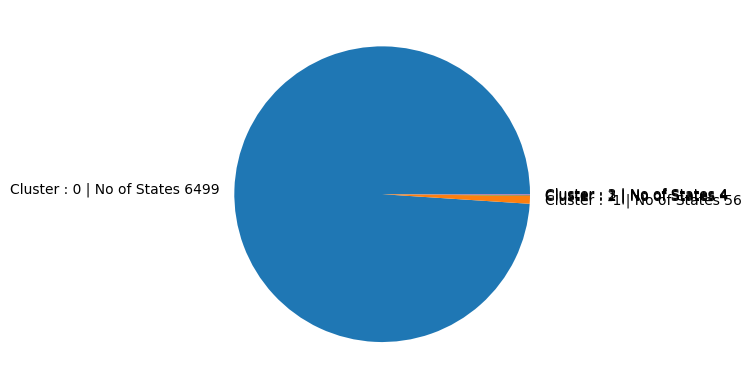

In [91]:
print('Statewise cluster distribution')

data = df[['Name','Clsuters']]
print(data['Clsuters'].value_counts())
plt.pie(data['Clsuters'].value_counts(),
        labels=[f"Cluster : {i} | No of States {j}" for i,j in zip([0,-1,1,2,3],data['Clsuters'].value_counts().values)]
)
plt.show()


Note:
1. Values are negative for some paramters because these are scaled values. 
2. Std scaling will give you negative values for some. 



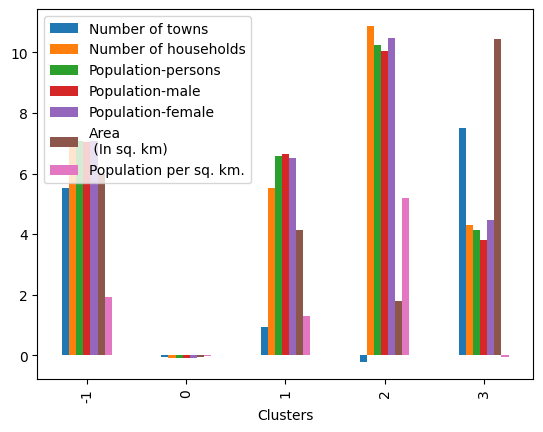

In [92]:
dfc.groupby(by='Clusters').mean().plot(kind='bar')
text = """
Note:
1. Values are negative for some paramters because these are scaled values. 
2. Std scaling will give you negative values for some. 
"""
print(text)


<Axes: >

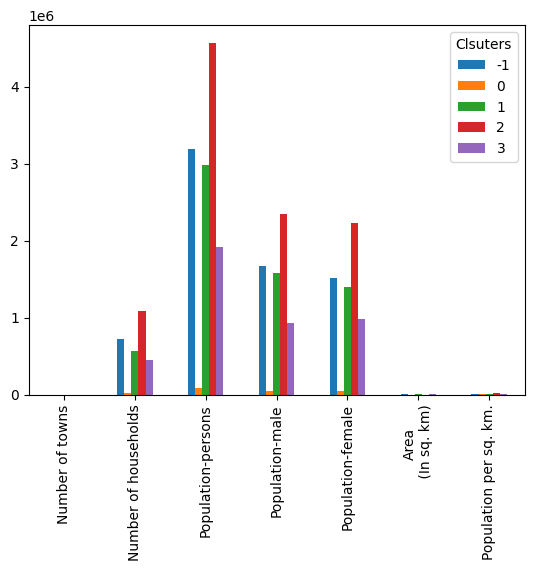

In [96]:
data = df[['Number of towns', 'Number of households',
       'Population-persons', 'Population-male', 'Population-female',
       'Area\n (In sq. km)', 'Population per sq. km.', 'Clsuters']]
data.groupby(by='Clsuters').mean().T.plot(kind='bar')

Note:
1. This is plot of unscaled values.


In [99]:
data = df[['Number of towns', 'Number of households',
       'Population-persons', 'Population-male', 'Population-female',
       'Area\n (In sq. km)', 'Population per sq. km.', 'Clsuters']]
data.groupby(by='Clsuters').agg(['mean','max','min','count']).T

Clsuters                                -1             0            1  \
Number of towns        mean   3.733929e+01  2.072473e+00        8.250   
                       max    1.380000e+02  4.700000e+01       12.000   
                       min    0.000000e+00  0.000000e+00        5.000   
                       count  5.600000e+01  6.499000e+03        4.000   
Number of households   mean   7.209531e+05  1.735837e+04   564976.750   
                       max    2.180638e+06  5.716760e+05   577510.000   
                       min    1.901700e+04  0.000000e+00   555060.000   
                       count  5.600000e+01  6.499000e+03        4.000   
Population-persons     mean   3.185958e+06  8.264544e+04  2977190.000   
                       max    9.356962e+06  2.719736e+06  3038996.000   
                       min    7.085900e+04  0.000000e+00  2922323.000   
                       count  5.600000e+01  6.499000e+03        4.000   
Population-male        mean   1.667847e+06  4.273441e+04  1575325.000   
                       max    5.031323e+06  1.460609e+06  1622546.000   
                       min    3.520400e+04  0.000000e+00  1519608.000   
                       count  5.600000e+01  6.499000e+03        4.000   
Population-female      mean   1.518112e+06  3.991103e+04  1401865.000   
                       max    4.325639e+06  1.259127e+06  1458272.000   
                       min    3.565500e+04  0.000000e+00  1353374.000   
                       count  5.600000e+01  6.499000e+03        4.000   
Area\n (In sq. km)     mean   5.282930e+02  2.600505e+01      376.515   
                       max    1.628120e+03  5.822900e+02      470.710   
                       min    4.430000e+00  0.000000e+00      309.860   
                       count  5.600000e+01  6.499000e+03        4.000   
Population per sq. km. mean   1.086168e+04  2.251449e+03     8129.250   
                       max    8.918500e+04  6.977900e+04     9462.000   
                       min    1.060000e+02  0.000000e+00     6456.000   
                       count  5.600000e+01  6.499000e+03        4.000   

Clsuters                              2             3  
Number of towns        mean         1.0  5.000000e+01  
                       max          1.0  5.600000e+01  
                       min          1.0  4.400000e+01  
                       count        4.0  4.000000e+00  
Number of households   mean   1089955.0  4.477720e+05  
                       max    1154982.0  5.540960e+05  
                       min    1024928.0  3.459620e+05  
                       count        4.0  4.000000e+00  
Population-persons     mean   4571713.0  1.911314e+06  
                       max    4646732.0  2.234363e+06  
                       min    4496694.0  1.521111e+06  
                       count        4.0  4.000000e+00  
Population-male        mean   2346305.0  9.297688e+05  
                       max    2356766.0  1.101047e+06  
                       min    2335844.0  7.668500e+05  
                       count        4.0  4.000000e+00  
Population-female      mean   2225408.0  9.815455e+05  
                       max    2310888.0  1.133316e+06  
                       min    2139928.0  7.542610e+05  
                       count        4.0  4.000000e+00  
Area\n (In sq. km)     mean       180.0  9.003825e+02  
                       max        185.0  9.441500e+02  
                       min        175.0  8.325300e+02  
                       count        4.0  4.000000e+00  
Population per sq. km. mean     25429.5  2.114250e+03  
                       max      26553.0  2.415000e+03  
                       min      24306.0  1.827000e+03  
                       count        4.0  4.000000e+00

In [112]:
df.sort_values(by='Clsuters',ascending=False).head(12)

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,No_of_villages_inhabited,No_of_villages_unhabited,Number of towns,Number of households,Population-persons,Population-male,Population-female,Area\n (In sq. km),Population per sq. km.,Clsuters
19893,33,633,0,DISTRICT,Tiruppur,Urban,0,0,49,429023,1521111,766850,754261,832.53,1827.0,3
18984,32,592,0,DISTRICT,Malappuram,Urban,0,0,44,345962,1817211,865020,952191,899.59,2020.0,3
18972,32,591,0,DISTRICT,Kozhikode,Urban,0,0,51,462007,2072572,986158,1086414,944.15,2195.0,3
19041,32,595,0,DISTRICT,Ernakulam,Urban,0,0,56,554096,2234363,1101047,1133316,925.26,2415.0,3
8481,19,342,99999,SUB-DISTRICT,Area not under any Sub-district,Urban,0,0,1,1024928,4496694,2356766,2139928,185.00,24306.0,2
8478,19,342,0,DISTRICT,Kolkata,Urban,0,0,1,1024928,4496694,2356766,2139928,185.00,24306.0,2
19206,33,603,99999,SUB-DISTRICT,Area not under any Sub-district,Urban,0,0,1,1154982,4646732,2335844,2310888,175.00,26553.0,2
19203,33,603,0,DISTRICT,Chennai,Urban,0,0,1,1154982,4646732,2335844,2310888,175.00,26553.0,2
3063,9,164,0,DISTRICT,Kanpur Nagar,Urban,0,0,10,569962,3015645,1622546,1393099,322.84,9341.0,1
2955,9,157,0,DISTRICT,Lucknow,Urban,0,0,12,577510,3038996,1580724,1458272,470.71,6456.0,1
